### About the Dataset
- The datasets consist of several medical predictor (independent) variables and one target (dependent) variable,Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age,and so on.

### Columns
- Pregnancies: Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0
### Task:
-        To build a machine learning model to accurately predict whether or not the patients in the dataset  have diabetes or not?

## Imports and configuration

###  importing Libraries

In [1]:

import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# from sklearn.metrics import plot_roc_curve

#for warning 

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("diabetes.csv")

### Inspect the Dataset

In [3]:
data.shape

(768, 9)

In [4]:

len(data)

768

In [5]:
data.ndim,data.size

(2, 6912)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

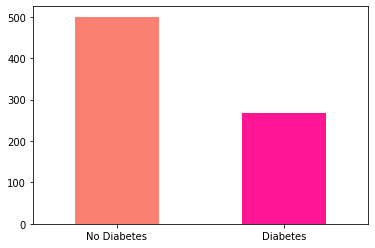

In [10]:

data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [11]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


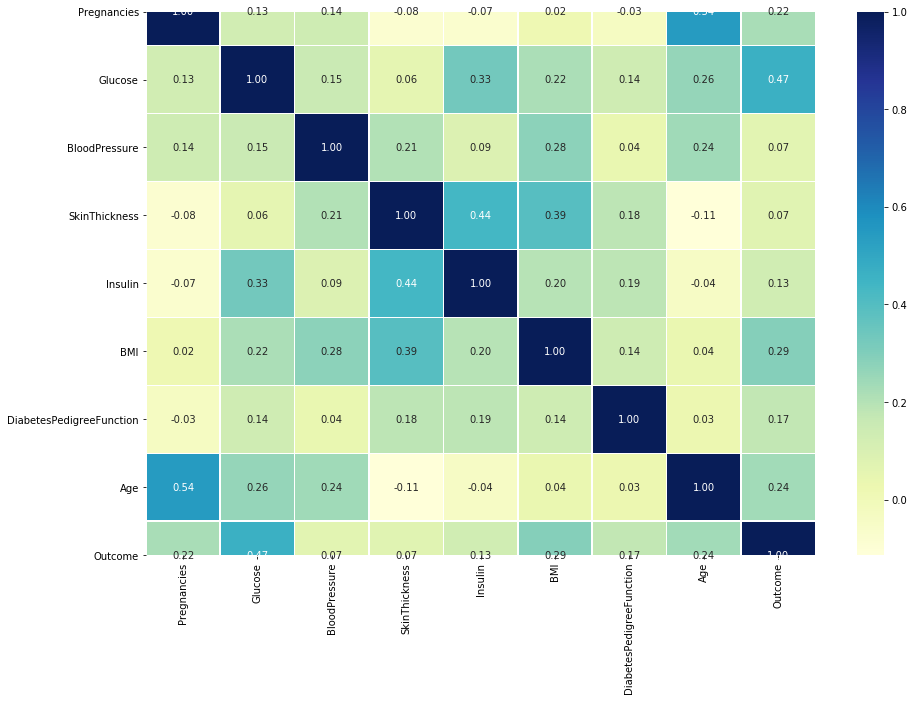

In [12]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [13]:
zero_avoid = ["Glucose" , "BloodPressure", "SkinThickness", "Insulin" , "BMI"]

In [14]:
for i in zero_avoid:
    data[i]= data[i].replace(0 , np.NaN)
    mean = int( data[i].mean(skipna = True) )
    data[i] = data[i].replace( np.NaN , mean)

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


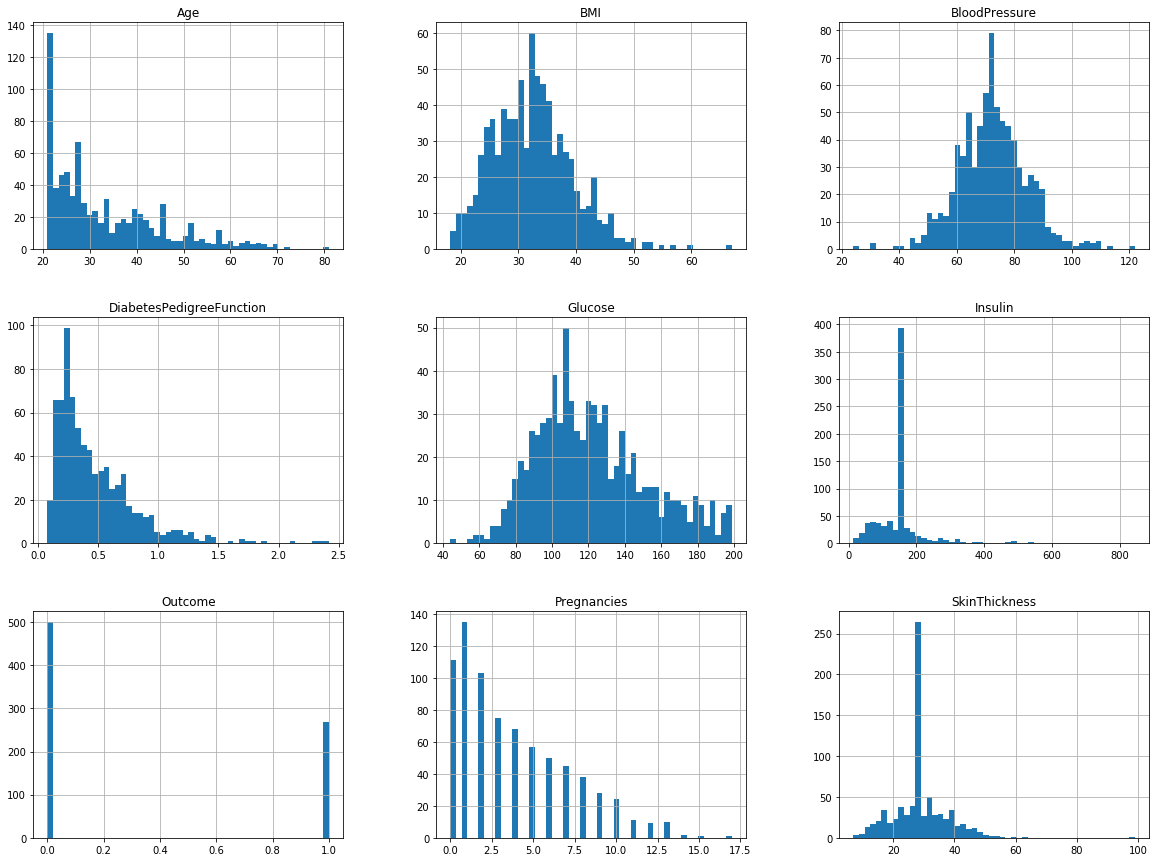

In [16]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

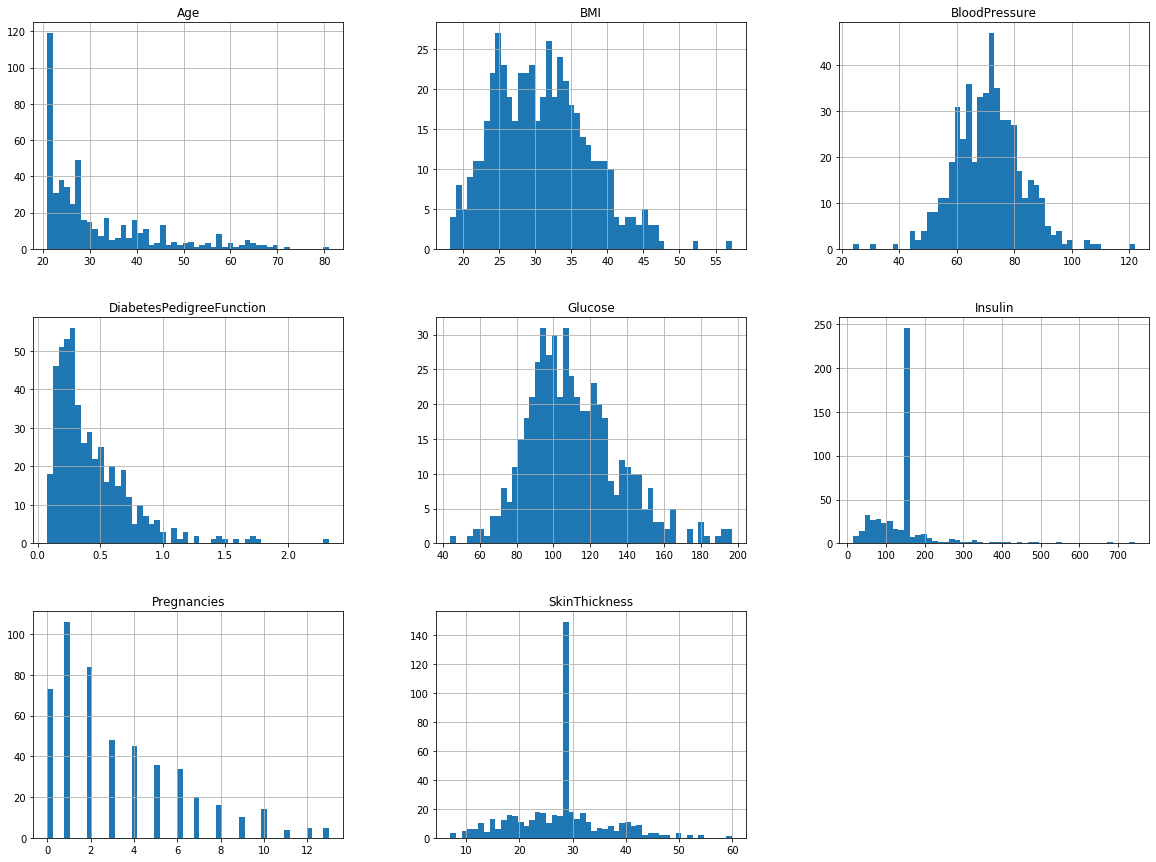

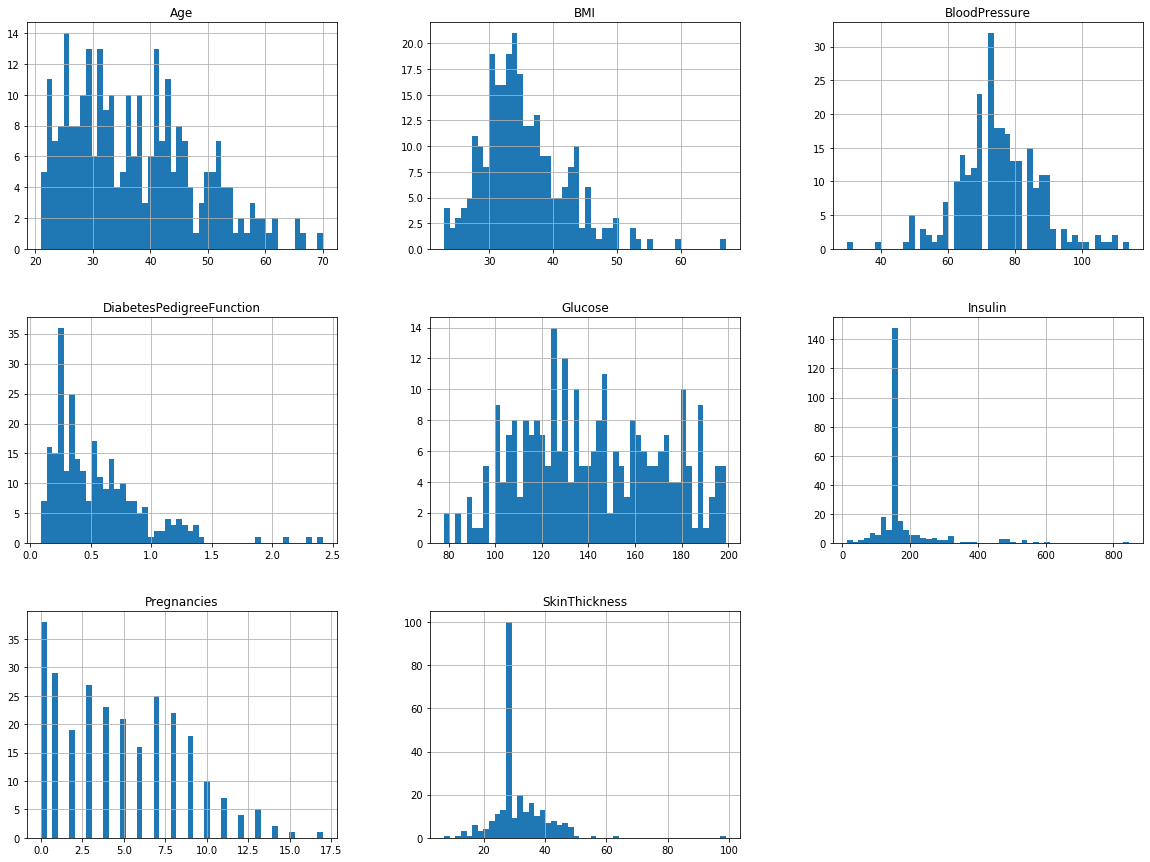

In [17]:
data.groupby('Outcome').hist(bins=50 , figsize=(20, 15))
plt.show()

# Scikit learn Split 

In [18]:
# from sklearn.model_selection import train_test_split
# XTrain , Xtest, YTrain , Ytest = train_test_split(X ,Y , test_size = .2)

#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
XTrain,Xtest,YTrain,Ytest =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [19]:
print(XTrain.shape , YTrain.shape)
print(Xtest.shape, Ytest.shape)

(614, 8) (614,)
(154, 8) (154,)


### Model Training :- 


#  Different Models:
 ## 1.Logistic Regression
 ## 2.KNN
 ## 3.Random Forest Classifier
 ## 4.Support Vector Machine

In [20]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(XTrain,YTrain);
## Evaluating the model
log_reg = log_reg.score(Xtest,Ytest)

In [21]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(XTrain,YTrain);
## Evaluating the model
knn = knn.score(Xtest,Ytest)

In [22]:

## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(XTrain,YTrain);
## Evaluating the model
clf = clf.score(Xtest,Ytest)

In [23]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(XTrain,YTrain)
svm = svm.score(Xtest,Ytest)

In [24]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [25]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.811688,0.75974,0.772727,0.720779


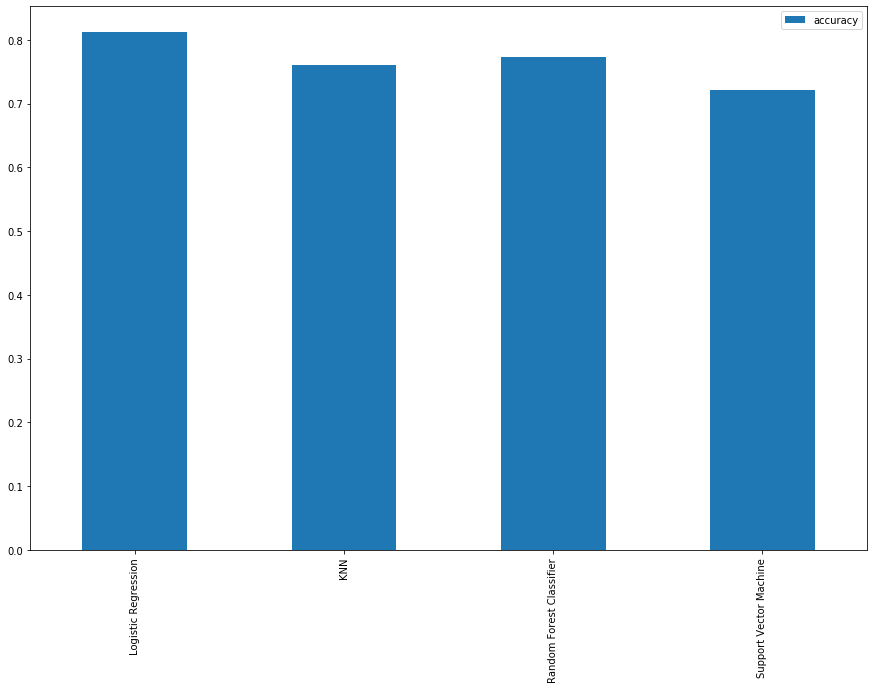

In [26]:
model_compare.T.plot.bar(figsize=(15,10));

In [27]:

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [28]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(XTrain, YTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [29]:

score = rs_log_reg.score(Xtest,Ytest)
score

0.8311688311688312

In [30]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(XTrain,YTrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [31]:
gs_log_reg.score(Xtest,Ytest)

0.8311688311688312

### Best Model is logistic Regression with 83% accuracy



#### Evaluating the tuned model by RandomizedSearchcv

In [32]:
y_preds = gs_log_reg.predict(Xtest)
y_preds 

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
np.array(Ytest)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [34]:
# plot ROC curve
#plot_roc_curve(gs_log_reg,Xtest,Ytest)

In [35]:
print(confusion_matrix(Ytest,y_preds))

[[104   7]
 [ 19  24]]


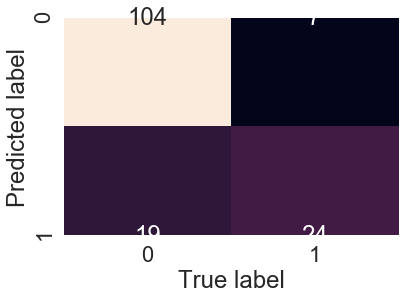

In [36]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(Ytest,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

### Loading and Saving a model

In [37]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes_model.pkl", "wb"))

In [38]:
loaded_model = pickle.load(open("Diabetes_model.pkl", "rb"))
loaded_model.predict(Xtest)
loaded_model.score(Xtest,Ytest)

0.8311688311688312


### Predicting the Outcome Using New data

In [39]:

## Enter the new data
Xtest.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27


In [40]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

 3
 126
 88
 41
 235
 39
 .704
 27


In [41]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

In [42]:
row_df

,0,1,2,3,4,5,6,7
0,3,126,88,41,235,39,.704,27


In [43]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.4554317134349684


In [44]:
loaded_model.predict(row_df)[0]

0

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [14]:
model = KNeighborsClassifier()

In [15]:
model.fit(XTrain , YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_predict_model = model.predict(Xtest)

In [17]:
print(y_predict_model)

[1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [18]:
def score():
    return y_predict_model==Ytest
y_predict_model_score = score()
accuracy_model = (np.unique(y_predict_model_score , return_counts=True)[1][1]/y_predict_model.shape)*100

In [19]:
print(accuracy_model[0])

68.83116883116884


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(XTrain , YTrain)

/Users/habiburrahmankhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_predict_model = model.predict(Xtest)

In [33]:
print(y_predict_model)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]


In [34]:
def score():
    return y_predict_model==Ytest
y_predict_model_score = score()
accuracy_model = (np.unique(y_predict_model_score , return_counts=True)[1][1]/y_predict_model.shape)*100

In [35]:
print(accuracy_model[0])

71.42857142857143


### Using KNN 

In [20]:
def distance(x1 ,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X , Y ,queryPoint  , k=11 ):
    vals = []
    m = X.shape[0]
    for i in range(m):
        dist = distance(X[i] , queryPoint)
        vals.append((dist ,Y[i]))
    vals = sorted(vals)
    vals = np.array(vals[: k])
    new_vals = np.unique(vals[ : , 1] , return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [21]:
preds = []
m = Xtest.shape[0]
print(m)
for i in range(m):
    pred = knn(XTrain , YTrain ,Xtest[i])
    preds.append(int(pred))

154


In [22]:
y_predict = np.array(preds)

In [23]:
print(y_predict)

[0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0]


In [24]:
def score():
    return y_predict==Ytest

In [25]:
scorearray = score()

In [26]:
print(scorearray)

[ True  True  True  True False  True  True  True False False False  True
  True False  True False  True  True  True  True  True  True False  True
  True  True  True  True False False False  True False  True False  True
  True  True  True  True  True  True False  True False  True  True  True
 False  True  True False False  True  True False  True  True False  True
 False  True  True False  True  True  True  True False  True  True False
  True  True  True False  True  True  True  True  True False False  True
  True False  True  True  True False  True  True False  True False  True
 False  True  True  True  True  True  True  True  True  True False  True
  True False False  True  True  True False  True  True  True False  True
  True  True False  True False  True  True  True  True False  True  True
  True  True  True False  True  True False  True  True  True  True  True
 False False  True  True  True  True  True  True False  True]


In [27]:
percentage = (np.unique(scorearray , return_counts=True)[1][1]/y_predict.shape)*100

In [28]:
print(percentage[0])

71.42857142857143
